# Principal Component Analysis: Educational Assessment Data

This analysis demonstrates Principal Component Analysis (PCA) on student assessment data
to understand patterns in academic performance across different skill areas.

**Learning objectives:**
- Apply PCA to identify underlying dimensions in multivariate data
- Interpret eigenvalues and explained variance ratios
- Use scree plots to determine optimal number of components
- Understand variable relationships through biplots
- Validate dimensionality reduction effectiveness

## Import Libraries and Setup

**Task:** Set up your Python environment for PCA analysis by importing the necessary libraries. You'll need pandas for data handling, numpy for numerical operations, scikit-learn's PCA and StandardScaler for the analysis, matplotlib for visualization, and configure a basic logger to track the analysis steps.

In [37]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Simple logger
import logging

logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")
logger = logging.getLogger(__name__)

## Data Loading and Exploration

**Task:** Load the educational assessment data from the CSV file in the current directory. Check if the file exists (if not, inform the user to run the fetch script). Extract the assessment variables (excluding the Student ID column) and display basic information about the dataset dimensions and variable names using the logger.

In [38]:
script_dir = Path.cwd()
data_path = script_dir / "educational.csv"

if not data_path.exists():
    logger.error(f"Data file not found: {data_path}")
    logger.info("Run 'fetch_educational.py' to generate the required data file")
    sys.exit(2)

df = pd.read_csv(data_path)
logger.info(
    f"Loaded dataset: {len(df)} students, {len(df.columns) - 1} assessment variables"
)

# Extract assessment variables (exclude Student ID)
X = df.iloc[:, 1:]
variable_names = list(X.columns)

logger.info(f"Assessment variables: {variable_names}")
logger.info(f"Data shape: {X.shape}")

INFO: Loaded dataset: 100 students, 6 assessment variables
INFO: Assessment variables: ['MathTest', 'VerbalTest', 'SocialSkills', 'Leadership', 'RandomVar1', 'RandomVar2']
INFO: Data shape: (100, 6)


## Data Standardization

**Task:** Standardize the assessment data using scikit-learn's StandardScaler so that all variables have mean 0 and standard deviation 1. This ensures that variables measured on different scales contribute equally to the PCA. Log a confirmation message after standardization is complete.

Standardization ensures all variables contribute equally to the analysis,
preventing variables with larger scales from dominating the principal components.

In [39]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

logger.info("Data standardized: mean ≈ 0, std ≈ 1 for all variables")

INFO: Data standardized: mean ≈ 0, std ≈ 1 for all variables


## Principal Component Analysis

**Task:** Apply PCA to the standardized data and transform it to obtain principal component scores. Extract the eigenvalues, explained variance ratios, and cumulative variance. Log these results rounded to 3 decimal places to understand how much variance each component captures.

PCA identifies linear combinations of variables that capture maximum variance.

In [40]:
pca = PCA()
Z = pca.fit_transform(X_standardized)

eigenvalues = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_ratio)

logger.info("PCA Results:")
logger.info(f"Eigenvalues: {np.round(eigenvalues, 3)}")
logger.info(f"Explained variance ratio: {np.round(explained_ratio, 3)}")
logger.info(f"Cumulative variance: {np.round(cumulative_variance, 3)}")

INFO: PCA Results:
INFO: Eigenvalues: [2.223 1.87  0.97  0.862 0.134 0.   ]
INFO: Explained variance ratio: [0.367 0.309 0.16  0.142 0.022 0.   ]
INFO: Cumulative variance: [0.367 0.675 0.836 0.978 1.    1.   ]


### Interpreting the Variance Structure

The eigenvalues and explained variance ratios reveal the underlying dimensionality:

**Key insights:**
- **PC1**: Captures the largest amount of variance, likely representing general academic ability
- **PC2**: Secondary dimension, possibly distinguishing cognitive vs. social skills
- **Later components**: May capture measurement noise or minor skill variations
- **Cumulative variance**: Shows how much total information is retained with each component

**Component retention strategy:**
- Kaiser criterion: Retain components with eigenvalues > 1.0
- Scree plot: Look for the "elbow" where eigenvalues level off
- Practical rule: Retain components explaining ≥80% cumulative variance

## Scree Plot Analysis

**Task:** Create a scree plot showing the eigenvalues for each principal component. Plot the eigenvalues as a line with markers, add a horizontal reference line at eigenvalue = 1.0 (Kaiser criterion), and include proper labels and title. Save the plot as 'pca_scree.png' in the current directory.

The scree plot visualizes eigenvalues to help determine the optimal number of components.
Look for the "elbow" where the curve levels off, indicating diminishing returns.

INFO: Scree plot saved: c:\Users\L03071644\Repositories\ma2003b\ma2003b.worktrees\dev\lessons\ch4_Factor_Analysis\examples\educational_example\pca_scree.png


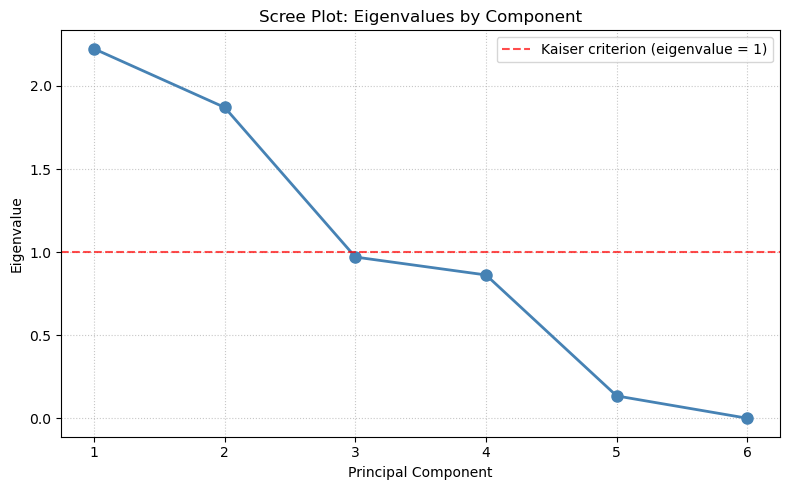

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))
components = np.arange(1, len(eigenvalues) + 1)

ax.plot(components, eigenvalues, "o-", linewidth=2, color="steelblue", markersize=8)
ax.axhline(
    y=1.0,
    color="red",
    linestyle="--",
    alpha=0.7,
    label="Kaiser criterion (eigenvalue = 1)",
)

ax.set_xticks(components)
ax.set_xlabel("Principal Component")
ax.set_ylabel("Eigenvalue")
ax.set_title("Scree Plot: Eigenvalues by Component")
ax.grid(True, linestyle=":", alpha=0.7)
ax.legend()

plt.tight_layout()
scree_path = script_dir / "pca_scree.png"
plt.savefig(scree_path, dpi=150, bbox_inches="tight")
logger.info(f"Scree plot saved: {scree_path}")
plt.show()

**Scree plot interpretation:**
- Components with eigenvalues > 1.0 explain more variance than individual variables
- The "elbow" indicates where additional components provide diminishing returns
- Steep decline suggests strong underlying factor structure
- Flat tail indicates measurement noise or minor factors

## Biplot Visualization

**Task:** Create a PCA biplot combining student scores on PC1 and PC2 (as colored scatter points) with variable loadings (as red arrows emanating from the origin). Scale the loading arrows appropriately so they're visible on the same plot. Color the points by their PC1 score using a colormap. Include axis labels showing the variance explained by each component. Save the plot as 'pca_biplot.png'.

The biplot combines:
- **Points**: Individual student scores on PC1 and PC2
- **Arrows**: Variable loadings showing how each assessment contributes to the components

**Interpretation guide:**
- Arrow direction indicates which component the variable loads on
- Arrow length indicates loading strength
- Similar arrows suggest variables measure related constructs
- Opposite arrows indicate negative correlation

INFO: Variable 'MathTest' loading on PC1: -0.459
INFO: Variable 'MathTest' loading on PC2: 0.513
INFO: Variable 'VerbalTest' loading on PC1: -0.447
INFO: Variable 'VerbalTest' loading on PC2: 0.507
INFO: Variable 'SocialSkills' loading on PC1: 0.488
INFO: Variable 'SocialSkills' loading on PC2: 0.451
INFO: Variable 'Leadership' loading on PC1: 0.533
INFO: Variable 'Leadership' loading on PC2: 0.396
INFO: Variable 'RandomVar1' loading on PC1: 0.259
INFO: Variable 'RandomVar1' loading on PC2: 0.098
INFO: Variable 'RandomVar2' loading on PC1: -0.016
INFO: Variable 'RandomVar2' loading on PC2: -0.332
INFO: Biplot saved: c:\Users\L03071644\Repositories\ma2003b\ma2003b.worktrees\dev\lessons\ch4_Factor_Analysis\examples\educational_example\pca_biplot.png


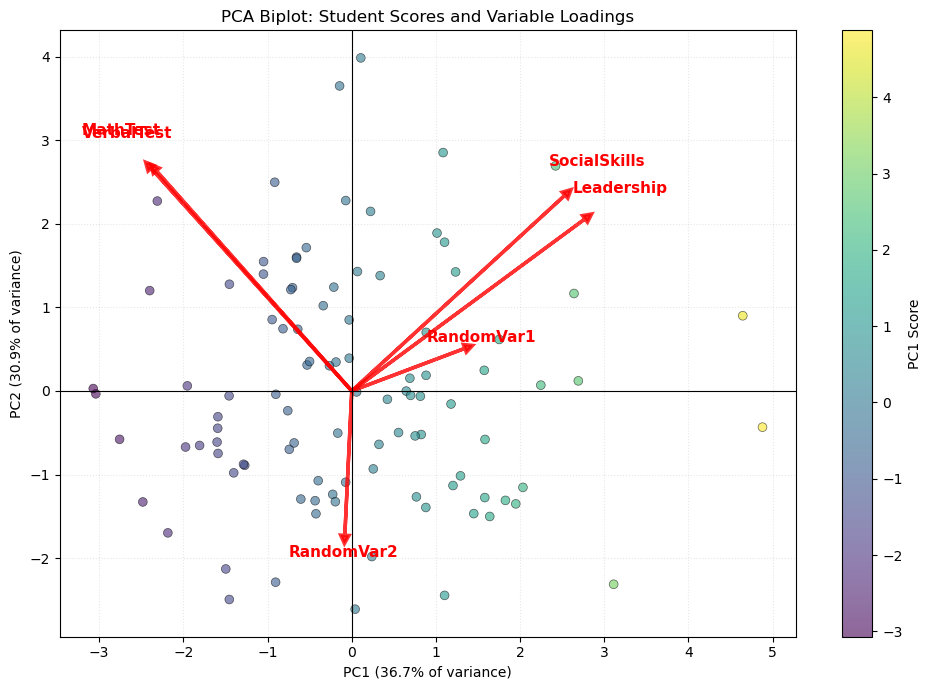

In [42]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot student scores
pc1_scores = Z[:, 0]
pc2_scores = Z[:, 1]

scatter = ax.scatter(
    pc1_scores,
    pc2_scores,
    c=pc1_scores,
    cmap="viridis",
    alpha=0.6,
    s=40,
    edgecolors="black",
    linewidth=0.5,
)
colorbar = plt.colorbar(scatter, label="PC1 Score")

# Plot variable loadings as arrows
scale_factor = max(pc1_scores.std(), pc2_scores.std()) * 3.5

for i, var_name in enumerate(variable_names):
    loading_x = pca.components_[0, i] * scale_factor
    logger.info(f"Variable '{var_name}' loading on PC1: {loading_x/scale_factor:.3f}")
    loading_y = pca.components_[1, i] * scale_factor
    logger.info(f"Variable '{var_name}' loading on PC2: {loading_y/scale_factor:.3f}")

    ax.arrow(
        0,
        0,
        loading_x,
        loading_y,
        color="red",
        head_width=0.1,
        alpha=0.8,
        linewidth=2.5,
        head_length=0.1,
    )
    ax.text(
        loading_x * 1.15,
        loading_y * 1.15,
        var_name,
        color="red",
        fontweight="bold",
        fontsize=11,
        ha="center",
    )

ax.set_xlabel(f"PC1 ({explained_ratio[0]:.1%} of variance)")
ax.set_ylabel(f"PC2 ({explained_ratio[1]:.1%} of variance)")
ax.set_title("PCA Biplot: Student Scores and Variable Loadings")
ax.grid(True, linestyle=":", alpha=0.3)
ax.axhline(y=0, color="black", linewidth=0.8)
ax.axvline(x=0, color="black", linewidth=0.8)

plt.tight_layout()
biplot_path = script_dir / "pca_biplot.png"
plt.savefig(biplot_path, dpi=150, bbox_inches="tight")
logger.info(f"Biplot saved: {biplot_path}")
plt.show()

## Component Loadings Analysis

**Task:** Create a DataFrame showing the loadings (component coefficients) for the first 3 principal components. Use the variable names as row labels and 'PC1', 'PC2', 'PC3' as column names. Display the loadings table rounded to 3 decimal places with appropriate logging.

Loadings show how each variable contributes to each principal component.
High absolute loadings indicate strong relationships.

In [47]:
pca.components_.T

array([[-4.58921389e-01,  5.12634626e-01, -7.82161394e-02,
         1.15449661e-01, -4.94582694e-01,  5.12385079e-01],
       [-4.47008744e-01,  5.06872498e-01, -4.30431115e-02,
         2.34834710e-01,  5.17108827e-01, -4.67826746e-01],
       [ 4.87690750e-01,  4.50773983e-01, -2.65593341e-01,
        -4.73749436e-02, -4.79143683e-01, -5.06554707e-01],
       [ 5.33483467e-01,  3.96199534e-01, -2.23876119e-01,
         5.22389440e-02,  4.93528015e-01,  5.11861304e-01],
       [ 2.58601598e-01,  9.80157375e-02,  7.12440455e-01,
         6.36755129e-01, -1.02418900e-01, -2.32121518e-05],
       [-1.58958359e-02, -3.32426942e-01, -6.03156517e-01,
         7.21868165e-01, -6.59410216e-02, -2.08346166e-05]])

In [44]:
# Create loadings table for first 3 components
loadings_df = pd.DataFrame(
    pca.components_[:3].T, columns=["PC1", "PC2", "PC3"], index=variable_names
)

logger.info("Component Loadings Matrix:")
print(loadings_df.round(3))

INFO: Component Loadings Matrix:


                PC1    PC2    PC3
MathTest     -0.459  0.513 -0.078
VerbalTest   -0.447  0.507 -0.043
SocialSkills  0.488  0.451 -0.266
Leadership    0.533  0.396 -0.224
RandomVar1    0.259  0.098  0.712
RandomVar2   -0.016 -0.332 -0.603


### Loading Pattern Analysis

**Task:** Analyze the loading patterns to interpret what each component represents. For PC1 and PC2, identify and log the top 3 variables with the highest absolute loadings. Show the variable names and their loading values rounded to 3 decimal places.

In [45]:
# Analyze loading patterns to understand component meanings
logger.info("\nComponent Interpretation:")

# PC1 analysis
pc1_high = loadings_df["PC1"].abs().sort_values(ascending=False)
logger.info(f"PC1 ({explained_ratio[0]:.1%} variance) - highest loadings:")
for var, loading in pc1_high.head(3).items():
    logger.info(f"  {var}: {loading:.3f}")

INFO: 
Component Interpretation:
INFO: PC1 (36.7% variance) - highest loadings:
INFO:   Leadership: 0.533
INFO:   SocialSkills: 0.488
INFO:   MathTest: 0.459


**Task:** Now analyze PC2's loading pattern by identifying and logging the top 3 variables with the highest absolute loadings on PC2.

**Task:** Validate the factor structure by calculating the average absolute loading strength for cognitive variables (MathTest, VerbalTest) on PC1, social variables (SocialSkills, Leadership) on PC2, and the maximum loading of random variables on either PC1 or PC2. Log these strength values and determine whether there's a clear or mixed factor structure by comparing the strengths.

## Student Score Analysis

**Task:** Create a DataFrame containing student IDs with their PC1 and PC2 scores. Identify and log the top 5 students with the highest scores on PC1, showing both their PC1 and PC2 values rounded to 3 decimal places.

Examine how students rank on the principal components to understand
the practical meaning of each dimension.

In [46]:
# Create student ranking analysis
student_scores = pd.DataFrame(
    {"Student_ID": range(1, len(df) + 1), "PC1_Score": Z[:, 0], "PC2_Score": Z[:, 1]}
)

# Top performers on PC1
top_pc1 = student_scores.nlargest(5, "PC1_Score")
logger.info("Top 5 students on PC1 (likely general ability):")
for _, row in top_pc1.iterrows():
    logger.info(
        f"  Student {int(row['Student_ID'])}: PC1={row['PC1_Score']:.3f}, PC2={row['PC2_Score']:.3f}"
    )

INFO: Top 5 students on PC1 (likely general ability):
INFO:   Student 80: PC1=4.879, PC2=-0.433
INFO:   Student 14: PC1=4.645, PC2=0.899
INFO:   Student 75: PC1=3.111, PC2=-2.312
INFO:   Student 36: PC1=2.692, PC2=0.121
INFO:   Student 57: PC1=2.640, PC2=1.165


**Task:** Identify and log the top 5 students with the highest scores on PC2, showing both their PC1 and PC2 values rounded to 3 decimal places.

**Task:** Calculate and log summary statistics for the PC scores: the range (min to max) for both PC1 and PC2, and the correlation coefficient between PC1 and PC2 scores (which should be approximately zero since PCA produces orthogonal components).

## Summary and Key Takeaways

This PCA analysis revealed the underlying structure in student assessment data:

**Main findings:**
- **Dimensionality**: The data contains meaningful structure beyond individual variables
- **Component interpretation**: PC1 likely represents general ability, PC2 captures specific skill differences
- **Variance explanation**: The first few components explain most systematic variation
- **Variable relationships**: Related assessments cluster together in component space

**PCA principles demonstrated:**
- **Maximum variance**: PCA finds directions of greatest data variation
- **Orthogonality**: Components are uncorrelated, providing independent dimensions
- **Dimensionality reduction**: Fewer components can capture most information
- **Data visualization**: Biplots reveal both student patterns and variable relationships

**Practical applications:**
- **Student profiling**: Identify students with different ability patterns
- **Assessment design**: Understand which skills are measured independently
- **Data compression**: Reduce assessment battery while retaining key information
- **Quality control**: Detect variables that don't contribute meaningful information

**Next steps in multivariate analysis:**
- Compare with Factor Analysis for potentially cleaner factor structure
- Explore discriminant analysis for classification tasks
- Apply cluster analysis to identify student groups
- Use canonical correlation to relate assessment domains